In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses


In [11]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [12]:
df['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [13]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [14]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [15]:
df['sex'] = df['sex'].map({'male':1, 'female':0})

In [16]:
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})

In [17]:
df['region'] = df['region'].map({'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3 })

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,0,1725.55
2,28,1,33.0,3,0,0,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


In [19]:
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.019814,0.109414,0.041536,-0.025587,0.006833,0.298308
sex,-0.019814,1.000000,0.046405,0.017848,0.076596,-0.013179,0.058045
bmi,0.109414,0.046405,1.000000,0.012641,0.003964,-0.262769,0.198637
children,0.041536,0.017848,0.012641,1.000000,0.007331,0.001533,0.067389
smoker,-0.025587,0.076596,0.003964,0.007331,1.000000,-0.038697,0.787234
region,0.006833,-0.013179,-0.262769,0.001533,-0.038697,1.000000,-0.039144
expenses,0.298308,0.058045,0.198637,0.067389,0.787234,-0.039144,1.000000


In [20]:
X = df.iloc[:, :-1]
y = df['expenses']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [23]:
X_train

,age,sex,bmi,children,smoker,region
763,27,1,26.0,0,0,3
1079,63,1,33.7,3,0,0
178,46,0,28.9,2,0,1
287,63,0,26.2,0,0,2
1290,38,0,20.0,2,0,3
...,...,...,...,...,...,...
1096,51,0,35.0,2,1,3
1131,27,1,45.9,2,0,1
1295,20,1,22.0,1,0,1
861,38,0,28.0,3,0,1


In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model = DecisionTreeRegressor()

In [27]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [28]:
y_pred = model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_pred)

In [30]:
mse

45288448.84881195

In [31]:
mae = mean_absolute_error(y_test,y_pred)

In [32]:
mae

3253.4445970149254

In [33]:
r2 = r2_score(y_test,y_pred)

In [34]:
r2

0.7380805232139307

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model2 = LinearRegression()

In [37]:
model2.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = model2.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)

In [40]:
mse

35233489.10228373

In [41]:
mae = mean_absolute_error(y_test,y_pred)

In [42]:
mae

4064.2606918716615

In [43]:
r2 = r2_score(y_test,y_pred)

In [44]:
r2

0.7962319914770073

In [45]:
def check_result(y_test,y_pred):
    mae =mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print('MAE',mae)
    print('MSE',mse)
    print('Accuracy',r2)

In [46]:
check_result(y_test,y_pred)

MAE 4064.2606918716615
MSE 35233489.10228373
Accuracy 0.7962319914770073


In [47]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
random_forest_model = RandomForestRegressor(n_estimators=150, random_state=42)

In [56]:
random_forest_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [57]:
y_pred = random_forest_model.predict(X_test)

In [59]:
check_result(y_test,y_pred)

MAE 2655.373137114427
MSE 22801362.41067164
Accuracy 0.8681314758085531


In [60]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
GB_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [64]:
GB_model.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [66]:
y_pred = GB_model.predict(X_test)

In [67]:
check_result(y_test,y_pred)

MAE 2674.2791597374176
MSE 20700553.05103719
Accuracy 0.8802812160246428


In [71]:
DT_reg = 0.7380805232139307
linear_reg = 0.7962319914770073
random_for = 0.8681314758085531
GB_reg =  0.8802812160246428
accuracy = [DT_reg,linear_reg,random_for,GB_reg]

In [70]:
import seaborn as sns

<Axes: >

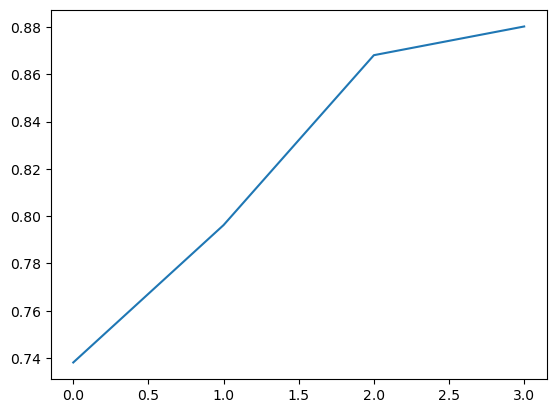

In [72]:
sns.lineplot(accuracy)